In [31]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

import numpy as np
import pandas as pd
from ljk_module.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *

In [9]:
df = pd.read_excel("./data/cars.xlsx")

In [10]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [11]:
X = df.copy()
Y = X.pop('dist')

In [13]:
pl = PolynomialFeatures(degree = 2, include_bias = False)

In [16]:
X_poly = pd.DataFrame(pl.fit_transform(X), columns = pl.get_feature_names_out())

In [18]:
X_poly.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


In [19]:
ss = StandardScaler()
X_poly_df = pd.DataFrame(ss.fit_transform(X_poly), columns = X_poly.columns)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_poly_df, Y, test_size = 0.3, random_state = 50)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.45630728790200403

In [41]:
rg = Ridge()
rg.fit(x_train, y_train)
rg.score(x_test, y_test)

0.4589141472118814

In [42]:
la = Lasso()
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.4660260327533525

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |         -0.450665 |
+----+-------------------+

[회귀식]
dist = 4.781 * speed + 16.135 * speed^2 + 42.980

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.667331 |             11.1069 |             216.494 |          14.7137 |                         38.3075 |              -19.5827 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+--

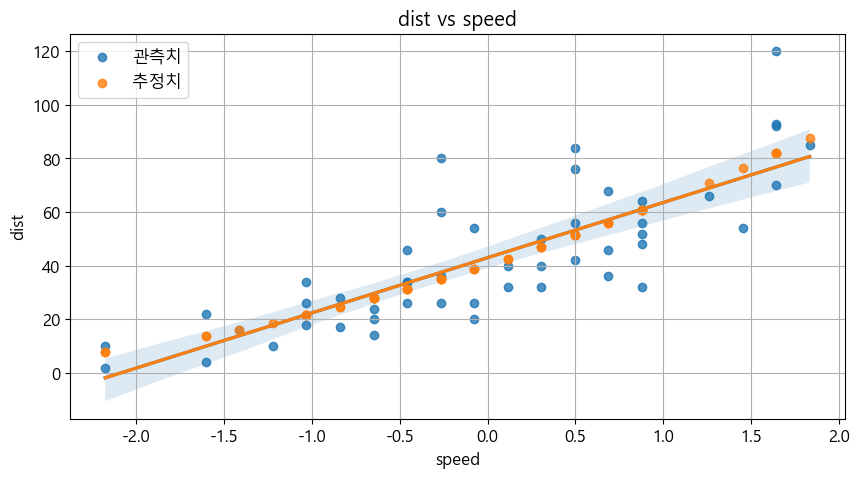

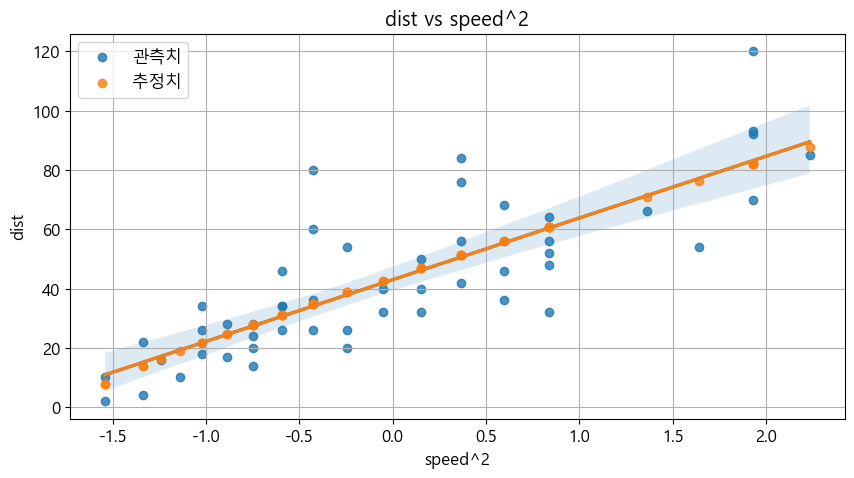

LinearRegression(n_jobs=-1)

In [35]:
my_linear_regression(X_poly_df, Y, cv = 5, use_plot = True, report = True, dpi = 100)

In [48]:
df2 = pd.read_excel("./data/fish.xlsx")

In [50]:
my_pretty_table(df2.head())

+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


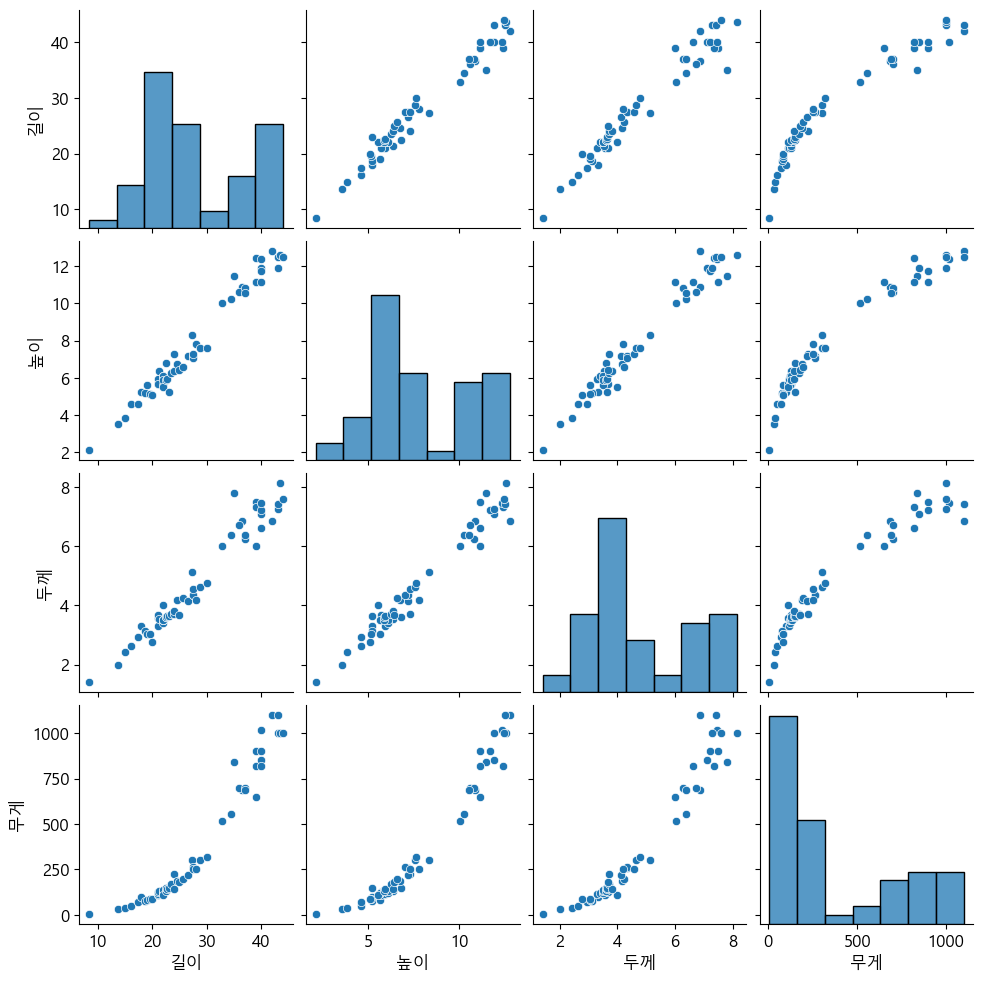

In [51]:
my_pairplot(df2)

In [59]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_fit = poly.fit_transform(df2.drop('무게', axis = 1))

In [62]:
poly_df = pd.DataFrame(poly_fit, columns = poly.get_feature_names_out())
my_pretty_table(poly_df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |
|  1 |   13.7 |   3.53 |      2 |   187.69 |      48.361 |        27.4 |  12.4609 |        7.06 |        4 |
|  2 |     15 |   3.82 |   2.43 |      225 |        57.3 |       36.45 |  14.5924 |      9.2826 |   5.9049 |
|  3 |   16.2 |   4.59 |   2.63 |   262.44 |      74.358 |      42.606 |  21.0681 |     12.0717 |   6.9169 |
|  4 |   17.4 |   4.59 |   2.94 |   302.76 |      79.866 |      51.156 |  21.0681 |     13.4946 |   8.6436 |
+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+


[회귀식]
무게 = -4.864 * 길이 + -55.902 * 높이 + 4.331 * 두께 + 0.553 * 길이^2 + -1.098 * 길이 높이 + -0.430 * 길이 두께 + 24.712 * 높이^2 + -56.267 * 높이 두께 + 51.478 * 두께^2 + 123.681

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.989254 |             23.8874 |              1275.3 |          35.7113 |                         14.5569 |              -6.38191 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------

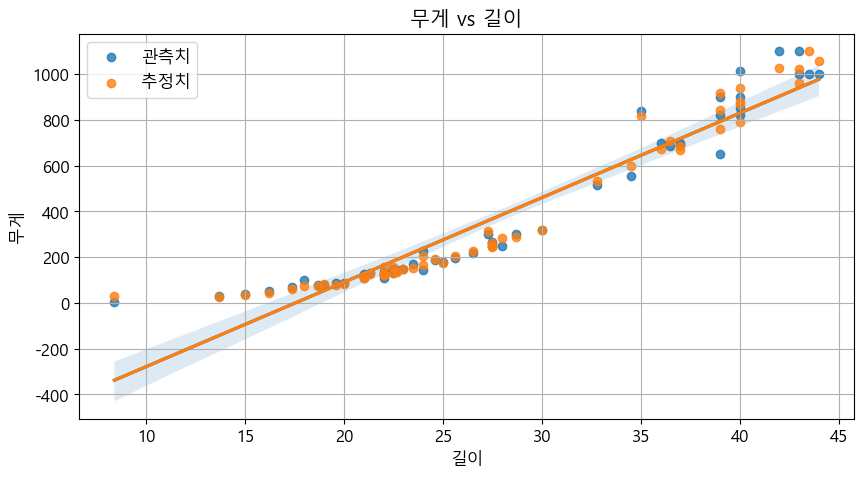

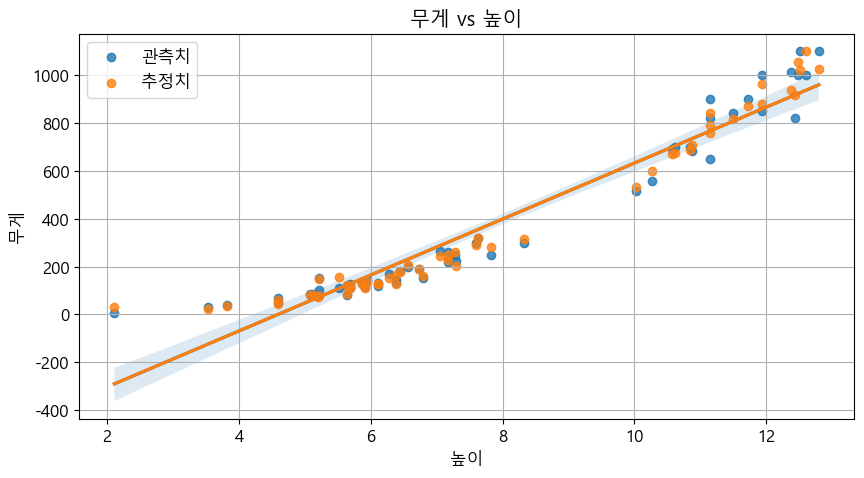

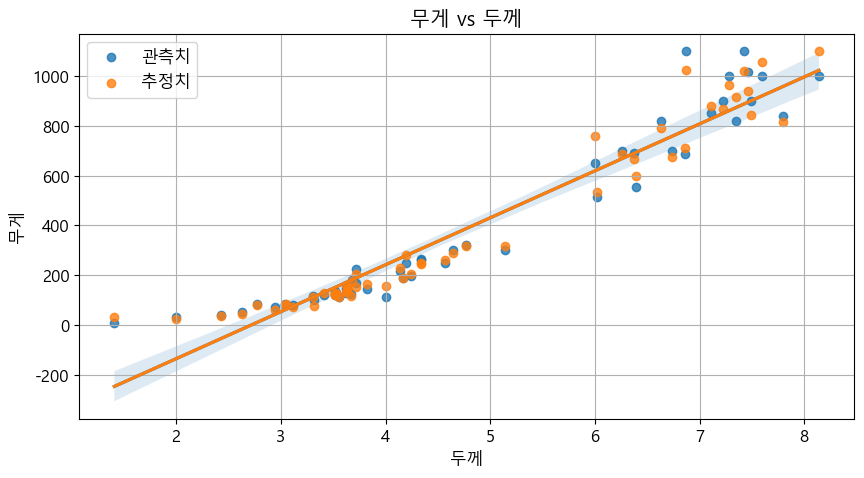

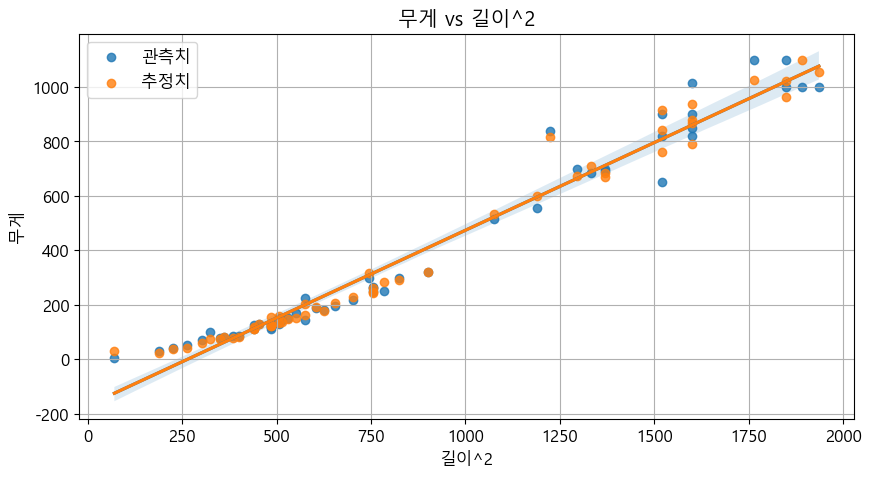

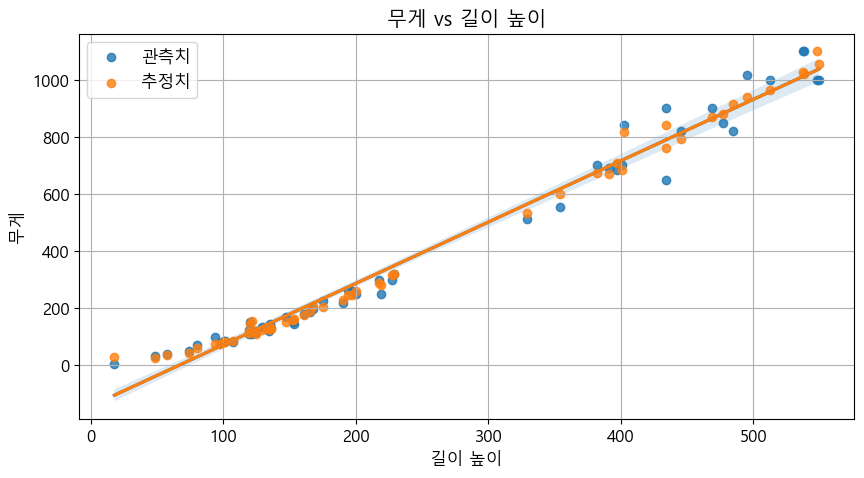

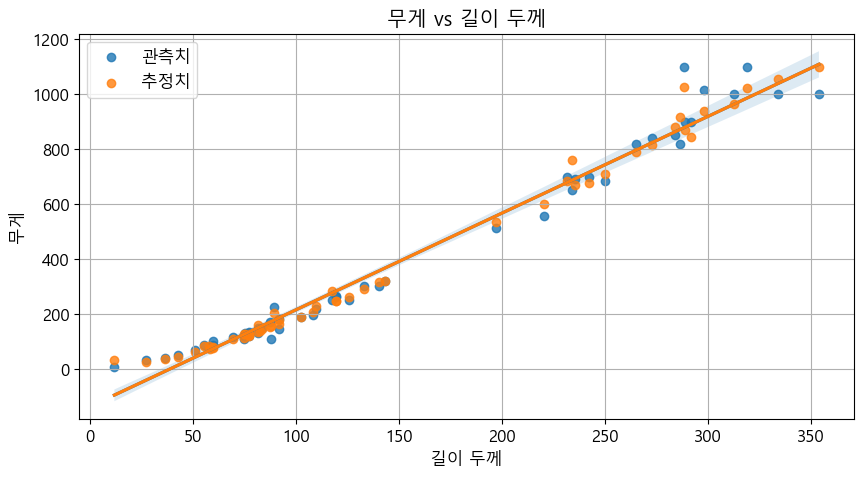

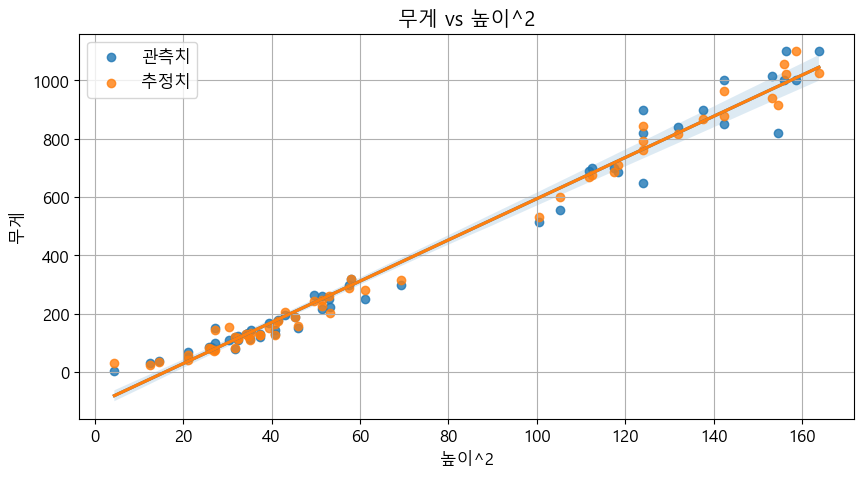

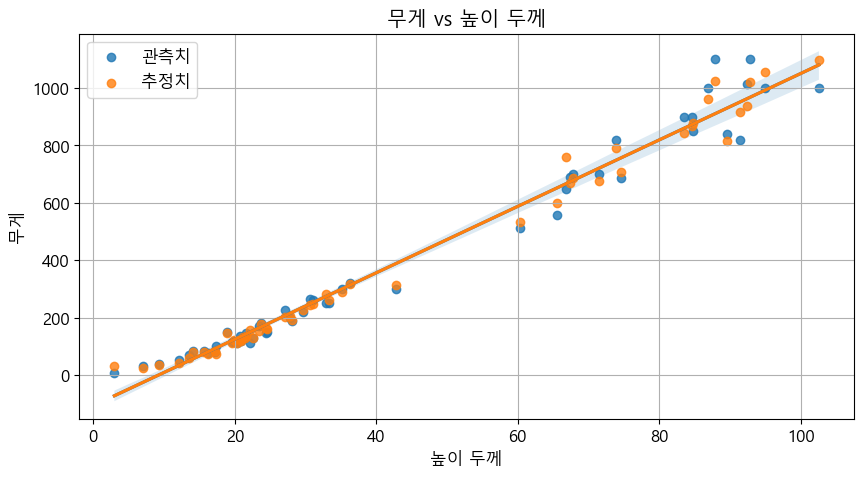

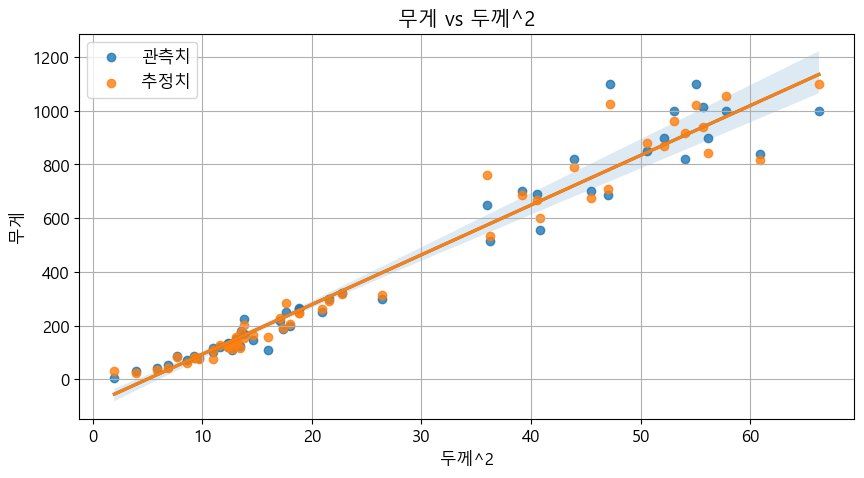

In [64]:
fit = my_linear_regression(poly_df, df2['무게'], dpi = 100)

In [69]:
ss = StandardScaler()
poly_ss = pd.DataFrame(ss.fit_transform(poly_df), columns = poly_df.columns)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(poly_df, df2['무게'], test_size = 0.25, random_state = 0)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(poly_ss, df2['무게'], test_size = 0.25, random_state = 0)

In [73]:
rg = Ridge()
rg2 = Ridge()
rg.fit(x_train, y_train)
rg2.fit(x_train_s, y_train_s)

Ridge()

In [74]:
rg.score(x_test, y_test)

0.9535424365032135

In [80]:
rg2.score(x_test_s, y_test_s)

0.9624131227147975

In [81]:
lr = LinearRegression()
lr2 = LinearRegression()
lr.fit(x_train, y_train)
lr2.fit(x_train_s, y_train_s)

LinearRegression()

In [82]:
lr.score(x_test, y_test)

0.951536988440772

In [83]:
lr2.score(x_test_s, y_test_s)

0.9515369884407732

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor(max_depth = 5, n_estimators = 300, random_state = 0, n_jobs = -1)

In [104]:
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9606065201859371